## 1. Importing Visualization Libraries and Data


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import json
import folium

In [35]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [36]:
country_geo = r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data\countries.geo.json'

In [37]:
country_geo

'C:\\Users\\Bori\\Documents\\Careerfoundry\\Happiness\\01 Data\\countries.geo.json'

In [38]:
# Create project folder path
path=r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data'

In [39]:
# Import data

df = pd.read_csv(os.path.join(path, 'Prepared Data', 'happiness_income_flags.csv'))

In [40]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Country,Happiness Rank,Happiness Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Perceptions of corruption,Generosity,Year,Income category
0,0,0.0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015.0,Middle income
1,1,1.0,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015.0,Middle income
2,2,2.0,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015.0,Middle income
3,3,3.0,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015.0,Middle income
4,4,4.0,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015.0,Middle income


In [41]:
# Checking the JSON file contents:

f = open(r'C:\Users\Bori\Documents\Careerfoundry\Happiness\01 Data\countries.geo.json')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AFG', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388]

In [42]:
df.shape

(1367, 13)

## 2. Data wrangling and cleaning

In [43]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Country', 'Happiness Rank',
       'Happiness Score', 'GDP per capita', 'Social support',
       'Health (Life Expectancy)', 'Freedom', 'Perceptions of corruption',
       'Generosity', 'Year', 'Income category'],
      dtype='object')

In [44]:
#Check for missing values
df.isnull().sum()

Unnamed: 0.1                   0
Unnamed: 0                     2
Country                        2
Happiness Rank               441
Happiness Score              441
GDP per capita                 2
Social support                 2
Health (Life Expectancy)       3
Freedom                        2
Perceptions of corruption      3
Generosity                     2
Year                           2
Income category                2
dtype: int64

In [45]:
df_dups = df[df.duplicated()]

### Extreme values check

<Axes: xlabel='Happiness Score', ylabel='Count'>

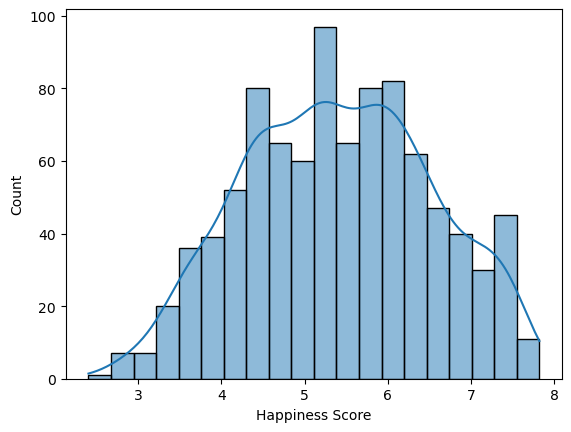

In [46]:
# shows extreme values for 'Happiness Score'
sns.histplot(df['Happiness Score'], bins=20, kde = True) 

<Axes: xlabel='GDP per capita', ylabel='Count'>

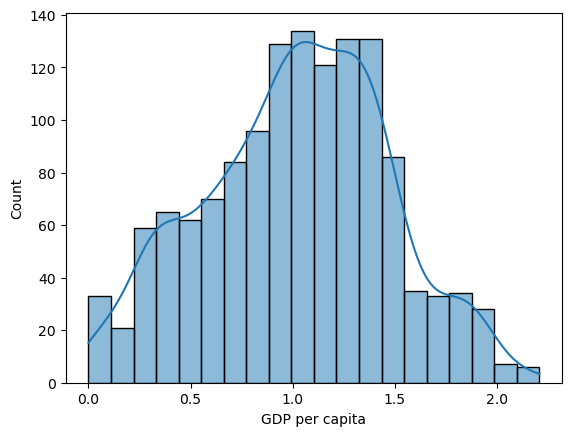

In [47]:
# shows extreme values for 'GDP per capita'
sns.histplot(df['GDP per capita'], bins=20, kde = True) 

<Axes: xlabel='Social support', ylabel='Count'>

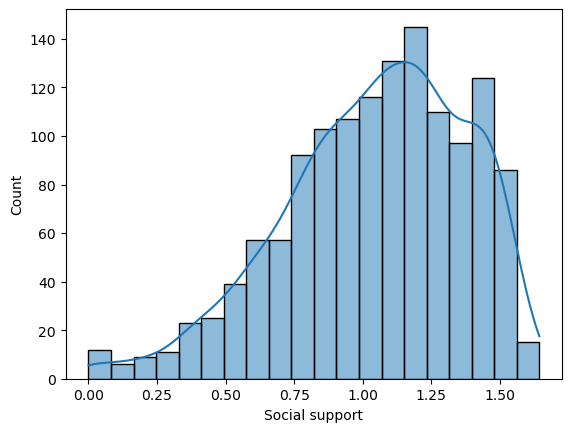

In [48]:
# shows extreme values for 'Social support'
sns.histplot(df['Social support'], bins=20, kde = True) 

<Axes: xlabel='Health (Life Expectancy)', ylabel='Count'>

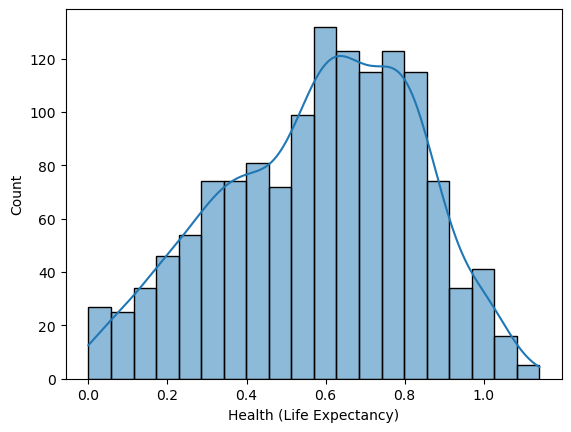

In [49]:
# shows extreme values for 'Health (Life Expectancy)'
sns.histplot(df['Health (Life Expectancy)'], bins=20, kde = True) 

<Axes: xlabel='Freedom', ylabel='Count'>

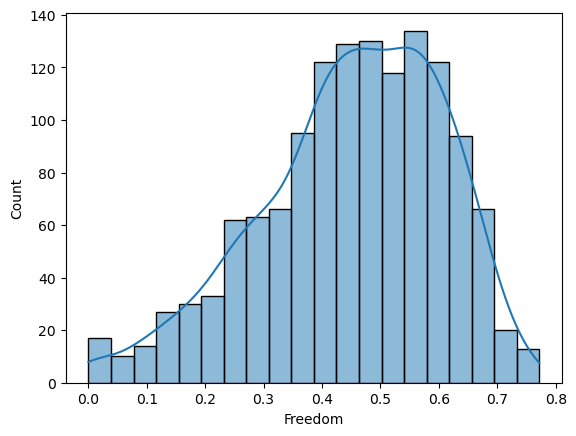

In [50]:
# shows extreme values for 'Freedom'
sns.histplot(df['Freedom'], bins=20, kde = True) 

<Axes: xlabel='Generosity', ylabel='Count'>

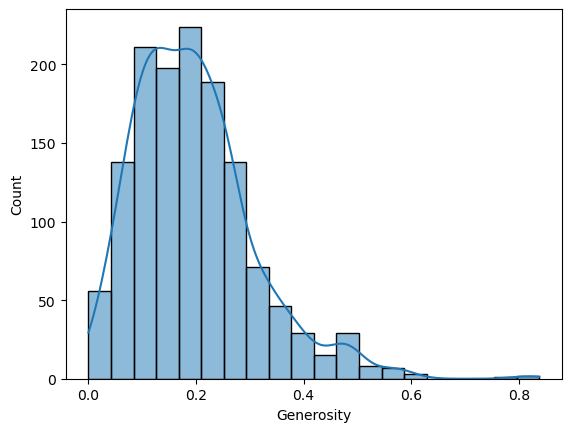

In [51]:
# shows extreme values for 'Gererosity'
sns.histplot(df['Generosity'], bins=20, kde = True) 

<Axes: xlabel='Perceptions of corruption', ylabel='Count'>

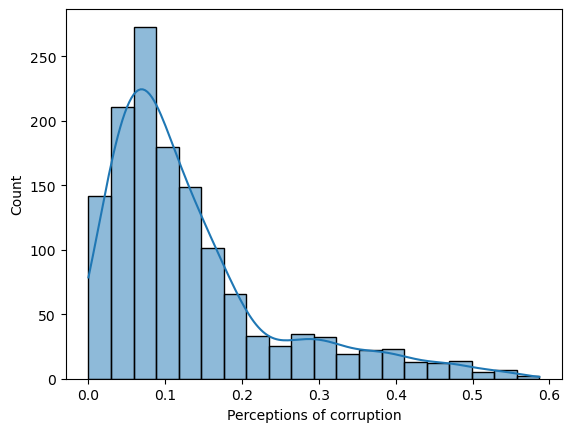

In [52]:
# shows extreme values for 'Perceptions of corruption'
sns.histplot(df['Perceptions of corruption'], bins=20, kde = True) 

No extreme values were found.

## 3. Create choropleth maps

In [53]:
# Finding average Happiness Score in each country
df_hs = df.groupby(['Country'], as_index=False)['Happiness Score'].mean()
df_hs.head()

,Country,Happiness Score
0,Afghanistan,3.328000
1,Albania,4.793667
2,Algeria,5.576667
3,Angola,3.872250
4,Argentina,6.377333


In [54]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_hs,
    columns = ['Country', 'Happiness Score'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Country Happiness Score").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [55]:
map03.save('Happiness Score.html')

In [56]:
# Finding average Happiness Score in each country
df_gdp = df.groupby(['Country'], as_index=False)['GDP per capita'].mean()
df_gdp.head()

,Country,GDP per capita
0,Afghanistan,0.428808
1,Albania,1.055091
2,Algeria,1.074519
3,Angola,0.798380
4,Argentina,1.214182


In [57]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_gdp,
    columns = ['Country', 'GDP per capita'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "GDP by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [59]:
map03.save('GDP.html')

In [60]:
# Finding average Happiness Score in each country
df_health = df.groupby(['Country'], as_index=False)['Health (Life Expectancy)'].mean()
df_health.head()

,Country,Health (Life Expectancy)
0,Afghanistan,0.226843
1,Albania,0.736645
2,Algeria,0.630523
3,Angola,0.133902
4,Argentina,0.709917


In [61]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_health,
    columns = ['Country', 'Health (Life Expectancy)'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Health by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [62]:
map03.save('Health.html')

In [63]:
# Finding average Social Support in each country
df_s = df.groupby(['Country'], as_index=False)['Social support'].mean()
df_s.head()

,Country,Social support
0,Afghanistan,0.267244
1,Albania,0.747904
2,Algeria,1.060781
3,Angola,0.938368
4,Argentina,1.277483


In [64]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_s,
    columns = ['Country', 'Social support'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Social support by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [65]:
map03.save('Social support.html')

In [66]:
# Finding average Social Support in each country
df_g = df.groupby(['Country'], as_index=False)['Generosity'].mean()
df_g.head()

,Country,Generosity
0,Afghanistan,0.197543
1,Albania,0.161051
2,Algeria,0.087557
3,Angola,0.105269
4,Argentina,0.085551


In [67]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_g,
    columns = ['Country', 'Generosity'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Generosity by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [68]:
map03.save('Generosity.html')

In [69]:
# Finding average Social Support in each country
df_f = df.groupby(['Country'], as_index=False)['Freedom'].mean()
df_f.head()

,Country,Freedom
0,Afghanistan,0.065513
1,Albania,0.430271
2,Algeria,0.165903
3,Angola,0.027433
4,Argentina,0.512771


In [70]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_f,
    columns = ['Country', 'Freedom'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Freedom by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [71]:
map03.save('Freedom.html')

In [72]:
# Finding average Social Support in each country
df_corr = df.groupby(['Country'], as_index=False)['Perceptions of corruption'].mean()
df_corr.head()

,Country,Perceptions of corruption
0,Afghanistan,0.040633
1,Albania,0.036707
2,Algeria,0.142410
3,Angola,0.071570
4,Argentina,0.068439


In [73]:
# Setup a folium map at a high-level zoom
map03 = folium.Map(location = [37, -97], zoom_start = 3.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo,
    data = df_corr,
    columns = ['Country', 'Perceptions of corruption'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrRd', fill_opacity=.75, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Corruption by country").add_to(map03)
folium.LayerControl().add_to(map03)

map03

In [74]:
map03.save('Corruption.html')

## Discuss results

**Choropleth map Happiness:** The map indicates the avarage happiness score (2015-2023) by country. We can see which county has the highest avarage happiness score, compare continents, etc.

**Choropleth map GDP:** The map indicates the avarage GDP (2015-2023) by country. We can see which county has the highest avarage GDP during the examined period, compare continents, etc.

**Choropleth map Social support:** The map indicates the avarage score for Social support (2015-2023) by country. We can see which county has the highest avarage level of social support during the examined period, compare continents, etc.

**Choropleth map Corruption:** The map indicates the avarage score for the Perceptions of corruption (2015-2023) by country. We can see which county has the highest, lowest etc avarage level of perceptions of corruption during the examined period, compare continents, etc.

**Choropleth map Freedom:** The map indicates the avarage score for Freedom (2015-2023) by country. We can see which county has the highest and lowest avarage level of freedom during the examined period, compare continents, etc.

**Choropleth map Generosity:** The map indicates the avarage score for Generosity (2015-2023) by country. We can see which county has the highest, lowest, etc. avarage level of generosity during the examined period, compare continents, etc.

**Choropleth map Health:** The map indicates the avarage score for Health (Life expectancy) (2015-2023) by country. We can see which county has the highest, lowest, etc. avarage level of health during the examined period, compare continents, etc.

Questions to further explore: I would like to see how the above variables changed dutring the years.
